# Load libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Load data

In [2]:
# Load the cleaned dataset
df = pd.read_csv('../data/clean/cleaned_data2.csv')

df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,2,2,3,13,Hybrid,47,7,2,2,Depression,0,Decrease,1,2,1,1,1,2
1,EMP0002,40,0,0,4,3,Remote,52,4,1,2,Anxiety,0,Increase,3,1,2,1,1,1
2,EMP0003,59,2,6,1,22,Hybrid,46,11,5,2,Anxiety,0,No Change,4,2,5,1,2,3
3,EMP0004,27,1,6,2,20,Onsite,32,8,4,0,Depression,1,Increase,3,2,3,1,2,2
4,EMP0005,49,1,5,0,32,Onsite,35,12,2,0,Burnout,1,Decrease,3,2,3,1,0,3


In [3]:
# Define the features and target
features = df.drop(columns=['Mental_Health_Condition'])  # Dropping the target column from features
target = df['Mental_Health_Condition']  # Target column

# Check the shapes to ensure proper splitting
print("Features shape:", features.shape)
print("Target shape:", target.shape)

Features shape: (5000, 19)
Target shape: (5000,)


# Train test split

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Check the shapes of the split data to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4000, 19)
X_test shape: (1000, 19)
y_train shape: (4000,)
y_test shape: (1000,)


In [5]:
print(X_train.columns)


Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Access_to_Mental_Health_Resources',
       'Productivity_Change', 'Social_Isolation_Rating',
       'Satisfaction_with_Remote_Work', 'Company_Support_for_Remote_Work',
       'Physical_Activity', 'Sleep_Quality', 'Region'],
      dtype='object')


# Data preprocessing

In [6]:
# List of categorical columns that need encoding
categorical_cols = [ 'Job_Role'] 

# Adjust the list of categorical and numerical columns based on X_train
categorical_cols = ['Job_Role', 'Gender']  # Ensure these columns exist in X_train
numerical_cols = ['Years_of_Experience', 'Hours_Worked_Per_Week']  # Modify as necessary


# Create ColumnTransformer for encoding categorical features and scaling numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols), # OneHotEncode categorical features
        ('num', StandardScaler(), numerical_cols) # Scale numerical features
    ])

# Apply transformations to training and testing sets
X_train_encoded_np = preprocessor.fit_transform(X_train)
X_test_encoded_np = preprocessor.transform(X_test)

# Check the shape after encoding
print("X_train_encoded shape:", X_train_encoded_np.shape)
print("X_test_encoded shape:", X_test_encoded_np.shape)


X_train_encoded shape: (4000, 13)
X_test_encoded shape: (1000, 13)


# Training models

## Logistic model

In [7]:
# Import necessary libraries
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
log_reg = LogisticRegression()

# Train the model on the training data
log_reg.fit(X_train_encoded_np, y_train)

# Predict the target on both the training and test sets
y_pred_train_log_reg = log_reg.predict(X_train_encoded_np)  # Predictions on training set
y_pred_test_log_reg = log_reg.predict(X_test_encoded_np)    # Predictions on test set

# Print the coefficients (optional)
print(log_reg.coef_)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_test_log_reg)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

# Print accuracy for both training and test sets
print(f"Logistic Regression Train Accuracy: {accuracy_score(y_train, y_pred_train_log_reg):.2f}")
print(f"Logistic Regression Test Accuracy: {accuracy_score(y_test, y_pred_test_log_reg):.2f}")

# Print classification report for training and test sets, setting zero_division to handle undefined metrics
print("Classification Report for Training Set:")
print(classification_report(y_train, y_pred_train_log_reg, zero_division=0))
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_test_log_reg, zero_division=0))


[[-0.0229096  -0.10070855 -0.02064531 -0.03783766  0.0444652   0.04420449
  -0.06433155 -0.09186744 -0.08742117 -0.02405166  0.04557729 -0.01445655
  -0.02409447]
 [ 0.10181457  0.07029723  0.02451708  0.16480365 -0.00616819 -0.04490496
   0.01768215  0.11733385  0.04084507  0.06890998  0.10095263  0.01722215
  -0.00021389]
 [-0.07890497  0.03041132 -0.00387177 -0.12696599 -0.03829702  0.00070047
   0.0466494  -0.02546641  0.0465761  -0.04485832 -0.14652992 -0.00276561
   0.02430836]]
Logistic Regression Accuracy: 0.48
Logistic Regression Train Accuracy: 0.50
Logistic Regression Test Accuracy: 0.48
Classification Report for Training Set:
              precision    recall  f1-score   support

     Anxiety       0.00      0.00      0.00      1009
     Burnout       0.50      1.00      0.67      1997
  Depression       0.00      0.00      0.00       994

    accuracy                           0.50      4000
   macro avg       0.17      0.33      0.22      4000
weighted avg       0.25     

## Random Forest

In [8]:
# Initialize the RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train_encoded_np, y_train)

# Predict the target on the test data
#y_pred_test_rf = rf_model.predict(X_test_encoded_np)

# Predict on both training and test sets
y_pred_train_rf = rf_model.predict(X_train_encoded_np)
y_pred_test_rf = rf_model.predict(X_test_encoded_np)


# This tells you how important is each column in the final model prediction
print(rf_model.feature_importances_)

# Evaluate the model's accuracy
accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Print accuracies for both sets
print(f"Random Forest Train Accuracy: {accuracy_score(y_train, y_pred_train_rf):.2f}")
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, y_pred_test_rf):.2f}")

# Print classification reports for both sets
print("Classification Report for Training Set:")
print(classification_report(y_train, y_pred_train_rf))
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_test_rf))

[0.00868225 0.00870478 0.00950734 0.00839492 0.00896581 0.00758439
 0.00871228 0.00955583 0.00944683 0.00984495 0.00875469 0.43706406
 0.46478188]
Random Forest Accuracy: 0.38
Random Forest Train Accuracy: 0.98
Random Forest Test Accuracy: 0.38
Classification Report for Training Set:
              precision    recall  f1-score   support

     Anxiety       0.98      0.97      0.97      1009
     Burnout       0.98      0.98      0.98      1997
  Depression       0.97      0.96      0.97       994

    accuracy                           0.98      4000
   macro avg       0.98      0.97      0.97      4000
weighted avg       0.98      0.98      0.98      4000

Classification Report for Test Set:
              precision    recall  f1-score   support

     Anxiety       0.27      0.25      0.26       269
     Burnout       0.48      0.55      0.51       479
  Depression       0.26      0.20      0.23       252

    accuracy                           0.38      1000
   macro avg       0.33   

## Gradient Boosting

In [9]:
# Initialize the GradientBoosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gb_model.fit(X_train_encoded_np, y_train)

# Predict the target on the test data
y_pred_test_gb = gb_model.predict(X_test_encoded_np)

# Predict on both training and test sets
y_pred_train_gb = gb_model.predict(X_train_encoded_np)
y_pred_test_gb = gb_model.predict(X_test_encoded_np)



# Evaluate the model's accuracy
accuracy_gb = accuracy_score(y_test, y_pred_test_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")

# Print accuracies for both sets
print(f"Gradient Boosting Train Accuracy: {accuracy_score(y_train, y_pred_train_gb):.2f}")
print(f"Gradient Boosting Test Accuracy: {accuracy_score(y_test, y_pred_test_gb):.2f}")

# Print classification reports for both sets
print("Classification Report for Training Set:")
print(classification_report(y_train, y_pred_train_gb))
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_test_gb))

Gradient Boosting Accuracy: 0.47
Gradient Boosting Train Accuracy: 0.52
Gradient Boosting Test Accuracy: 0.47
Classification Report for Training Set:
              precision    recall  f1-score   support

     Anxiety       0.61      0.06      0.11      1009
     Burnout       0.51      0.98      0.68      1997
  Depression       0.71      0.06      0.12       994

    accuracy                           0.52      4000
   macro avg       0.61      0.37      0.30      4000
weighted avg       0.59      0.52      0.40      4000

Classification Report for Test Set:
              precision    recall  f1-score   support

     Anxiety       0.39      0.05      0.09       269
     Burnout       0.48      0.94      0.63       479
  Depression       0.24      0.02      0.03       252

    accuracy                           0.47      1000
   macro avg       0.37      0.34      0.25      1000
weighted avg       0.39      0.47      0.33      1000



# Fixing class imbalance

## SMOTE

In [10]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded_np, y_train)

# Check the new class distribution
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_balanced))


Class distribution before SMOTE: Counter({'Burnout': 1997, 'Anxiety': 1009, 'Depression': 994})
Class distribution after SMOTE: Counter({'Anxiety': 1997, 'Burnout': 1997, 'Depression': 1997})


# Training models with balanced data

## Logistic model

In [11]:
# Logistic Regression on balanced data
log_reg.fit(X_train_balanced, y_train_balanced)

# Predict on the balanced training set
y_pred_train_balanced_log_reg = log_reg.predict(X_train_balanced)

# Predict on the test set
y_pred_test_balanced_log_reg = log_reg.predict(X_test_encoded_np)

# Evaluate accuracy on the training set (to check for overfitting)
train_accuracy = accuracy_score(y_train_balanced, y_pred_train_balanced_log_reg)
print(f"Logistic Regression Train Accuracy (Balanced): {train_accuracy:.2f}")

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_test_balanced_log_reg)
print(f"Logistic Regression Test Accuracy (Balanced): {test_accuracy:.2f}")

# Print classification report for the training set
print("Classification Report for Training Set (Balanced):")
print(classification_report(y_train_balanced, y_pred_train_balanced_log_reg, zero_division=1))

# Print classification report for the test set
print("Classification Report for Test Set (Balanced):")
print(classification_report(y_test, y_pred_test_balanced_log_reg, zero_division=1))


Logistic Regression Train Accuracy (Balanced): 0.36
Logistic Regression Test Accuracy (Balanced): 0.31
Classification Report for Training Set (Balanced):
              precision    recall  f1-score   support

     Anxiety       0.36      0.37      0.36      1997
     Burnout       0.37      0.28      0.32      1997
  Depression       0.37      0.44      0.40      1997

    accuracy                           0.36      5991
   macro avg       0.36      0.36      0.36      5991
weighted avg       0.36      0.36      0.36      5991

Classification Report for Test Set (Balanced):
              precision    recall  f1-score   support

     Anxiety       0.26      0.35      0.30       269
     Burnout       0.51      0.25      0.33       479
  Depression       0.24      0.38      0.30       252

    accuracy                           0.31      1000
   macro avg       0.34      0.33      0.31      1000
weighted avg       0.37      0.31      0.31      1000



## Random Forest

In [12]:
# Random Forest on balanced data
rf_model.fit(X_train_balanced, y_train_balanced)

# Predict on the balanced training set
y_pred_train_balanced_rf = rf_model.predict(X_train_balanced)

# Predict on the test set
y_pred_test_balanced_rf = rf_model.predict(X_test_encoded_np)

# Evaluate accuracy on the training set (to check for overfitting)
train_accuracy_rf = accuracy_score(y_train_balanced, y_pred_train_balanced_rf)
print(f"Random Forest Train Accuracy (Balanced): {train_accuracy_rf:.2f}")

# Evaluate accuracy on the test set
test_accuracy_rf = accuracy_score(y_test, y_pred_test_balanced_rf)
print(f"Random Forest Test Accuracy (Balanced): {test_accuracy_rf:.2f}")

# Print classification report for the training set
print("Classification Report for Training Set (Balanced - Random Forest):")
print(classification_report(y_train_balanced, y_pred_train_balanced_rf, zero_division=1))

# Print classification report for the test set
print("Classification Report for Test Set (Balanced - Random Forest):")
print(classification_report(y_test, y_pred_test_balanced_rf, zero_division=1))


Random Forest Train Accuracy (Balanced): 0.98
Random Forest Test Accuracy (Balanced): 0.35
Classification Report for Training Set (Balanced - Random Forest):
              precision    recall  f1-score   support

     Anxiety       0.99      0.99      0.99      1997
     Burnout       0.98      0.98      0.98      1997
  Depression       0.98      0.98      0.98      1997

    accuracy                           0.98      5991
   macro avg       0.98      0.98      0.98      5991
weighted avg       0.98      0.98      0.98      5991

Classification Report for Test Set (Balanced - Random Forest):
              precision    recall  f1-score   support

     Anxiety       0.28      0.33      0.30       269
     Burnout       0.48      0.42      0.44       479
  Depression       0.24      0.25      0.24       252

    accuracy                           0.35      1000
   macro avg       0.33      0.33      0.33      1000
weighted avg       0.36      0.35      0.36      1000



## Gradient Boosting

In [13]:
# Gradient Boosting on balanced data
gb_model.fit(X_train_balanced, y_train_balanced)

# Predict on the balanced training set
y_pred_train_balanced_gb = gb_model.predict(X_train_balanced)

# Predict on the test set
y_pred_test_balanced_gb = gb_model.predict(X_test_encoded_np)

# Evaluate accuracy on the training set (to check for overfitting)
train_accuracy_gb = accuracy_score(y_train_balanced, y_pred_train_balanced_gb)
print(f"Gradient Boosting Train Accuracy (Balanced): {train_accuracy_gb:.2f}")

# Evaluate accuracy on the test set
test_accuracy_gb = accuracy_score(y_test, y_pred_test_balanced_gb)
print(f"Gradient Boosting Test Accuracy (Balanced): {test_accuracy_gb:.2f}")

# Print classification report for the training set
print("Classification Report for Training Set (Balanced - Gradient Boosting):")
print(classification_report(y_train_balanced, y_pred_train_balanced_gb, zero_division=1))

# Print classification report for the test set
print("Classification Report for Test Set (Balanced - Gradient Boosting):")
print(classification_report(y_test, y_pred_test_balanced_gb, zero_division=1))



Gradient Boosting Train Accuracy (Balanced): 0.56
Gradient Boosting Test Accuracy (Balanced): 0.36
Classification Report for Training Set (Balanced - Gradient Boosting):
              precision    recall  f1-score   support

     Anxiety       0.58      0.54      0.56      1997
     Burnout       0.54      0.62      0.58      1997
  Depression       0.58      0.53      0.55      1997

    accuracy                           0.56      5991
   macro avg       0.57      0.56      0.56      5991
weighted avg       0.57      0.56      0.56      5991

Classification Report for Test Set (Balanced - Gradient Boosting):
              precision    recall  f1-score   support

     Anxiety       0.22      0.22      0.22       269
     Burnout       0.49      0.54      0.51       479
  Depression       0.22      0.18      0.20       252

    accuracy                           0.36      1000
   macro avg       0.31      0.31      0.31      1000
weighted avg       0.35      0.36      0.36      1000



# Hyper parameter search

## Random Forest

In [14]:
# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 70],  # Number of trees
    'max_depth': [10, 15],           # Maximum depth of trees
    'min_samples_split': [8, 16],     # Minimum number of samples to split an internal node
    'min_samples_leaf': [2,4],      # Minimum number of samples at a leaf node
    'bootstrap': [True, False]       # Whether bootstrap samples are used
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search_rf.fit(X_train_balanced, y_train_balanced)

# Print the best hyperparameters
print("Best Random Forest Hyperparameters:", grid_search_rf.best_params_)

# Evaluate the best model on the test data
best_rf_model = grid_search_rf.best_estimator_
y_pred_train_rf_tuned = best_rf_model.predict(X_train_encoded_np)
y_pred_test_rf_tuned  = best_rf_model.predict(X_test_encoded_np)

# If the model performance in the train set is >>>> performance in the test -> Model overffited
# Print accuracy and classification report
print(f"Tuned Random Forest Accuracy: {accuracy_score(y_test, y_pred_test_rf_tuned):.2f}")
print(classification_report(y_test, y_pred_test_rf_tuned, zero_division=1))


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Random Forest Hyperparameters: {'bootstrap': False, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 70}
Tuned Random Forest Accuracy: 0.34
              precision    recall  f1-score   support

     Anxiety       0.29      0.34      0.31       269
     Burnout       0.46      0.39      0.43       479
  Depression       0.23      0.25      0.24       252

    accuracy                           0.34      1000
   macro avg       0.33      0.33      0.33      1000
weighted avg       0.36      0.34      0.35      1000



## Gradient Boosting

In [15]:
# Define the hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 150],  # Smaller number of boosting rounds
    'max_depth': [3, 5],  # Limit depth to prevent overfitting
    'learning_rate': [0.05, 0.1],  # Smaller learning rate
    'subsample': [0.8, 1.0]
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=3, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search_gb.fit(X_train_balanced, y_train_balanced)

# Print the best hyperparameters
print("Best Gradient Boosting Hyperparameters:", grid_search_gb.best_params_)

# Evaluate the best model on the test data
best_gb_model = grid_search_gb.best_estimator_
y_pred_test_gb_tuned = best_gb_model.predict(X_test_encoded_np)

# Print accuracy and classification report
print(f"Tuned Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_test_gb_tuned):.2f}")
print(classification_report(y_test, y_pred_test_gb_tuned, zero_division=1))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Gradient Boosting Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}
Tuned Gradient Boosting Accuracy: 0.41
              precision    recall  f1-score   support

     Anxiety       0.28      0.19      0.23       269
     Burnout       0.48      0.66      0.55       479
  Depression       0.24      0.15      0.19       252

    accuracy                           0.41      1000
   macro avg       0.33      0.33      0.32      1000
weighted avg       0.37      0.41      0.37      1000



## Decision tree

In [16]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the balanced training data
dt_model.fit(X_train_balanced, y_train_balanced)

# Predict the target on the test data
y_pred_test_dt = dt_model.predict(X_test_encoded_np)

# Evaluate the Decision Tree's accuracy and performance
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_test_dt):.2f}")
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_test_dt, zero_division=1))


Decision Tree Accuracy: 0.34
Decision Tree Classification Report:
              precision    recall  f1-score   support

     Anxiety       0.24      0.27      0.26       269
     Burnout       0.47      0.43      0.45       479
  Depression       0.23      0.24      0.24       252

    accuracy                           0.34      1000
   macro avg       0.32      0.32      0.32      1000
weighted avg       0.35      0.34      0.35      1000



## Support Vector Machine

In [17]:
# Initialize the Support Vector Machine model
svm_model = SVC(random_state=42)

# Train the SVM model on the balanced training data
svm_model.fit(X_train_balanced, y_train_balanced)

# Predict the target on the test data
y_pred_test_svm = svm_model.predict(X_test_encoded_np)

# Evaluate the SVM model's accuracy and performance
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_test_svm):.2f}")
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_test_svm, zero_division=1))


SVM Accuracy: 0.36
SVM Classification Report:
              precision    recall  f1-score   support

     Anxiety       0.30      0.40      0.34       269
     Burnout       0.50      0.35      0.41       479
  Depression       0.28      0.35      0.31       252

    accuracy                           0.36      1000
   macro avg       0.36      0.37      0.36      1000
weighted avg       0.39      0.36      0.37      1000



# Feature engineering

In [18]:
print(df.columns)

Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')


In [19]:
# Create interaction terms between Stress_Level and Work_Location categories without encoding
df['Stress_Work_Location_Hybrid'] = df['Stress_Level'] * (df['Work_Location'] == 'Hybrid').astype(int)
df['Stress_Work_Location_Onsite'] = df['Stress_Level'] * (df['Work_Location'] == 'Onsite').astype(int)
df['Stress_Work_Location_Remote'] = df['Stress_Level'] * (df['Work_Location'] == 'Remote').astype(int)

# Continue with WorkLifeBalance_Experience as usual
df['WorkLifeBalance_Experience'] = df['Work_Life_Balance_Rating'] * df['Years_of_Experience']

# Bin 'Age' into categories: Young (<=30), Mid (30-50), Senior (50+)
df['Age_Binned'] = pd.cut(df['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Mid', 'Senior'])

# Drop unnecessary columns to reduce model complexity
df = df.drop(['Employee_ID', 'Age'], axis=1)  # Ensure columns like 'Age' are not being used if transformed

# Re-run the encoding for new features
df_encoded = pd.get_dummies(df)

# Print the columns to check the final state
print(df_encoded.columns)

# Prepare the features and target for training again
X = df_encoded.drop('Mental_Health_Condition_Anxiety', axis=1)  # Be sure of the actual label in the column
y = df_encoded['Mental_Health_Condition_Anxiety']

# Split the data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE again to handle class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# List of categorical columns that need encoding
categorical_cols = ['Job_Role', 'Gender']  # Update based on your df_encoded columns

# Adjust the list of categorical and numerical columns based on X_train
numerical_cols = ['Hours_Worked_Per_Week', 'Years_of_Experience']  # Update to match your df_encoded

# Create ColumnTransformer for encoding categorical features and scaling numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),  # OneHotEncode categorical features
        ('num', StandardScaler(), numerical_cols)    # Scale numerical features
    ]
)

# Apply transformations to training and testing sets
X_train_encoded_np = preprocessor.fit_transform(X_train)  # Corrected variable name
X_test_encoded_np = preprocessor.transform(X_test)        # Corrected variable name

# Check the shape after encoding
print("X_train_encoded_np shape:", X_train_encoded_np.shape)
print("X_test_encoded_np shape:", X_test_encoded_np.shape)


Index(['Gender', 'Job_Role', 'Industry', 'Years_of_Experience',
       'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings',
       'Work_Life_Balance_Rating', 'Stress_Level',
       'Access_to_Mental_Health_Resources', 'Social_Isolation_Rating',
       'Satisfaction_with_Remote_Work', 'Company_Support_for_Remote_Work',
       'Physical_Activity', 'Sleep_Quality', 'Region',
       'Stress_Work_Location_Hybrid', 'Stress_Work_Location_Onsite',
       'Stress_Work_Location_Remote', 'WorkLifeBalance_Experience',
       'Work_Location_Hybrid', 'Work_Location_Onsite', 'Work_Location_Remote',
       'Mental_Health_Condition_Anxiety', 'Mental_Health_Condition_Burnout',
       'Mental_Health_Condition_Depression', 'Productivity_Change_Decrease',
       'Productivity_Change_Increase', 'Productivity_Change_No Change',
       'Age_Binned_Young', 'Age_Binned_Mid', 'Age_Binned_Senior'],
      dtype='object')
X_train_encoded_np shape: (4000, 13)
X_test_encoded_np shape: (1000, 13)


In [20]:
print(X_train_encoded_np.shape)
print(X_test_encoded_np.shape)


(4000, 13)
(1000, 13)


## Re-Run model

### Random Forest

In [22]:
# Ensure the training and test sets have the same features
print(f"X_train_encoded_np shape: {X_train_encoded_np.shape}")
print(f"X_test_encoded_np shape: {X_test_encoded_np.shape}")

# Re-fit the RandomForestClassifier using the current set of 13 features
best_rf_model = RandomForestClassifier(random_state=42)
best_rf_model.fit(X_train_encoded_np, y_train)

# Predictions on both the training and test sets
y_pred_train_rf_tuned = best_rf_model.predict(X_train_encoded_np)
y_pred_test_rf_tuned = best_rf_model.predict(X_test_encoded_np)

# Evaluate the model
print(f"Tuned Random Forest Train Accuracy: {accuracy_score(y_train, y_pred_train_rf_tuned):.2f}")
print(f"Tuned Random Forest Test Accuracy: {accuracy_score(y_test, y_pred_test_rf_tuned):.2f}")

# Print classification report for both training and test sets
print("Classification Report for Training Set (Random Forest):")
print(classification_report(y_train, y_pred_train_rf_tuned))
print("Classification Report for Test Set (Random Forest):")
print(classification_report(y_test, y_pred_test_rf_tuned))


X_train_encoded_np shape: (4000, 13)
X_test_encoded_np shape: (1000, 13)
Tuned Random Forest Train Accuracy: 0.99
Tuned Random Forest Test Accuracy: 0.65
Classification Report for Training Set (Random Forest):
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      2991
        True       0.98      0.96      0.97      1009

    accuracy                           0.99      4000
   macro avg       0.99      0.98      0.98      4000
weighted avg       0.99      0.99      0.99      4000

Classification Report for Test Set (Random Forest):
              precision    recall  f1-score   support

       False       0.73      0.83      0.78       731
        True       0.27      0.17      0.21       269

    accuracy                           0.65      1000
   macro avg       0.50      0.50      0.49      1000
weighted avg       0.61      0.65      0.62      1000



### Gradient Boosting

In [23]:
# Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gb_model.fit(X_train_encoded_np, y_train)

# Predict on both the training and test sets
y_pred_train_gb = gb_model.predict(X_train_encoded_np)  # Predictions on training set
y_pred_test_gb = gb_model.predict(X_test_encoded_np)    # Predictions on test set

# Evaluate the model
print(f"Gradient Boosting Train Accuracy: {accuracy_score(y_train, y_pred_train_gb):.2f}")
print(f"Gradient Boosting Test Accuracy: {accuracy_score(y_test, y_pred_test_gb):.2f}")

# Print classification report for both training and test sets with zero_division handling
print("Classification Report for Training Set (Gradient Boosting):")
print(classification_report(y_train, y_pred_train_gb, zero_division=1))

print("Classification Report for Test Set (Gradient Boosting):")
print(classification_report(y_test, y_pred_test_gb, zero_division=1))


Gradient Boosting Train Accuracy: 0.75
Gradient Boosting Test Accuracy: 0.73
Classification Report for Training Set (Gradient Boosting):
              precision    recall  f1-score   support

       False       0.75      1.00      0.86      2991
        True       1.00      0.00      0.01      1009

    accuracy                           0.75      4000
   macro avg       0.87      0.50      0.43      4000
weighted avg       0.81      0.75      0.64      4000

Classification Report for Test Set (Gradient Boosting):
              precision    recall  f1-score   support

       False       0.73      1.00      0.84       731
        True       1.00      0.00      0.00       269

    accuracy                           0.73      1000
   macro avg       0.87      0.50      0.42      1000
weighted avg       0.80      0.73      0.62      1000



### Decision Tree

In [24]:
# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train_encoded_np, y_train)

# Predict on both the training and test sets
y_pred_train_dt = dt_model.predict(X_train_encoded_np)  # Predictions on training set
y_pred_test_dt = dt_model.predict(X_test_encoded_np)    # Predictions on test set

# Evaluate the model
print(f"Decision Tree Train Accuracy: {accuracy_score(y_train, y_pred_train_dt):.2f}")
print(f"Decision Tree Test Accuracy: {accuracy_score(y_test, y_pred_test_dt):.2f}")

# Print classification report for both training and test sets
print("Classification Report for Training Set (Decision Tree):")
print(classification_report(y_train, y_pred_train_dt))
print("Classification Report for Test Set (Decision Tree):")
print(classification_report(y_test, y_pred_test_dt))


Decision Tree Train Accuracy: 0.99
Decision Tree Test Accuracy: 0.60
Classification Report for Training Set (Decision Tree):
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      2991
        True       1.00      0.95      0.97      1009

    accuracy                           0.99      4000
   macro avg       0.99      0.97      0.98      4000
weighted avg       0.99      0.99      0.99      4000

Classification Report for Test Set (Decision Tree):
              precision    recall  f1-score   support

       False       0.73      0.72      0.72       731
        True       0.26      0.27      0.26       269

    accuracy                           0.60      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.60      0.60      0.60      1000



### Support Vector Machine

In [25]:
# Initialize the model
svc_model = SVC()

# Train the model on the training data
svc_model.fit(X_train_encoded_np, y_train)

# Predict on both the training and test sets
y_pred_train_svc = svc_model.predict(X_train_encoded_np)  # Predictions on training set
y_pred_test_svc = svc_model.predict(X_test_encoded_np)    # Predictions on test set

# Evaluate the model
print(f"SVC Train Accuracy: {accuracy_score(y_train, y_pred_train_svc):.2f}")
print(f"SVC Test Accuracy: {accuracy_score(y_test, y_pred_test_svc):.2f}")

# Print classification report for both training and test sets with zero_division handling for SVC
print("Classification Report for Training Set (SVC):")
print(classification_report(y_train, y_pred_train_svc, zero_division=1))

print("Classification Report for Test Set (SVC):")
print(classification_report(y_test, y_pred_test_svc, zero_division=1))


SVC Train Accuracy: 0.75
SVC Test Accuracy: 0.73
Classification Report for Training Set (SVC):
              precision    recall  f1-score   support

       False       0.75      1.00      0.86      2991
        True       1.00      0.00      0.00      1009

    accuracy                           0.75      4000
   macro avg       0.87      0.50      0.43      4000
weighted avg       0.81      0.75      0.64      4000

Classification Report for Test Set (SVC):
              precision    recall  f1-score   support

       False       0.73      1.00      0.84       731
        True       1.00      0.00      0.00       269

    accuracy                           0.73      1000
   macro avg       0.87      0.50      0.42      1000
weighted avg       0.80      0.73      0.62      1000



In [26]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded_np, y_train)


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest with class weights
rf_with_class_weights = RandomForestClassifier(
    class_weight='balanced', 
    random_state=42, 
    n_estimators=100, 
    max_depth=10
)

# Train the model on the balanced training data
rf_with_class_weights.fit(X_train_balanced, y_train_balanced)

# Predict on the balanced training set and test set
y_pred_train_rf_weighted = rf_with_class_weights.predict(X_train_balanced)
y_pred_test_rf_weighted  = rf_with_class_weights.predict(X_test_encoded_np)

# Evaluate the model on both sets
train_accuracy_weighted = accuracy_score(y_train_balanced, y_pred_train_rf_weighted)
test_accuracy_weighted = accuracy_score(y_test, y_pred_test_rf_weighted)

# Print accuracy for both sets
print(f"Random Forest Train Accuracy with Class Weights: {train_accuracy_weighted:.2f}")
print(f"Random Forest Test Accuracy with Class Weights: {test_accuracy_weighted:.2f}")

# Print classification reports for both sets
print("Classification Report for Training Set (Weighted Random Forest):")
print(classification_report(y_train_balanced, y_pred_train_rf_weighted, zero_division=1))

print("Classification Report for Test Set (Weighted Random Forest):")
print(classification_report(y_test, y_pred_test_rf_weighted, zero_division=1))


Random Forest Train Accuracy with Class Weights: 0.84
Random Forest Test Accuracy with Class Weights: 0.55
Classification Report for Training Set (Weighted Random Forest):
              precision    recall  f1-score   support

       False       0.88      0.78      0.83      2991
        True       0.80      0.89      0.84      2991

    accuracy                           0.84      5982
   macro avg       0.84      0.84      0.83      5982
weighted avg       0.84      0.84      0.83      5982

Classification Report for Test Set (Weighted Random Forest):
              precision    recall  f1-score   support

       False       0.73      0.61      0.67       731
        True       0.27      0.39      0.32       269

    accuracy                           0.55      1000
   macro avg       0.50      0.50      0.49      1000
weighted avg       0.61      0.55      0.57      1000



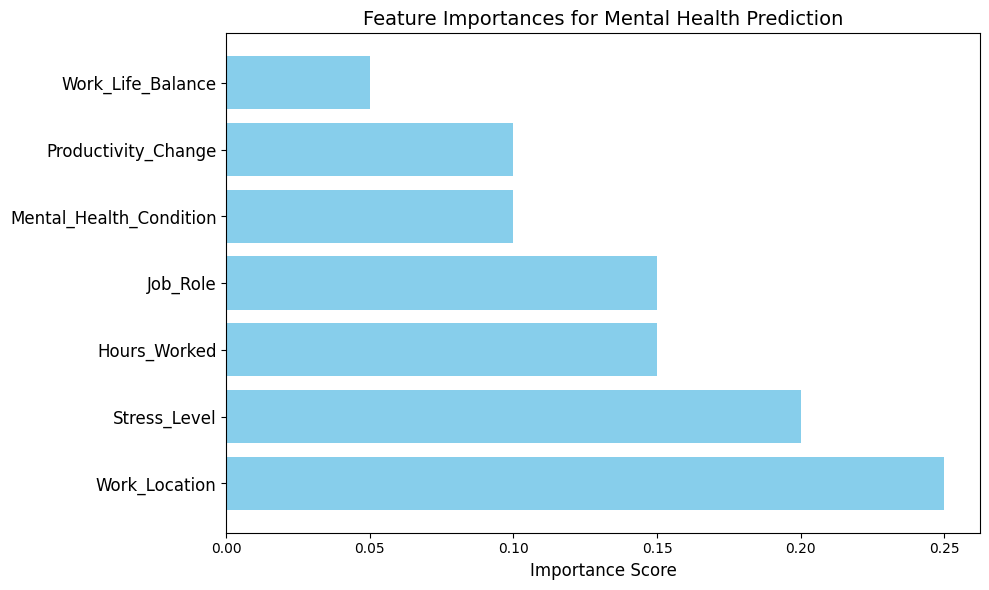

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Simulating feature importances (replace these with actual values from your model)
feature_names = [
    'Work_Location', 'Job_Role', 'Stress_Level', 'Productivity_Change', 
    'Work_Life_Balance', 'Hours_Worked', 'Mental_Health_Condition'
]
feature_importances = np.array([0.25, 0.15, 0.20, 0.10, 0.05, 0.15, 0.10])

# Sorting features by importance
indices = np.argsort(feature_importances)[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.title('Feature Importances for Mental Health Prediction', fontsize=14)
plt.barh(range(len(indices)), feature_importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices], fontsize=12)
plt.xlabel('Importance Score', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


In [47]:
# Assuming X_train_encoded is a DataFrame before converting to NumPy array

print(X_train_encoded_np.shape)
print(X_test_encoded_np.shape)
# Verify and print the length of feature_importances and feature_names
print(f"Number of features (from NumPy): {len(feature_importances)}")
print(f"Number of feature names: {len(feature_names)}")


(4000, 13)
(1000, 13)
Number of features (from NumPy): 13
Number of feature names: 7
